In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import operator as operator

In [3]:
president = pd.read_csv('./calhoun-president.txt')
straight_party = pd.read_csv('./calhoun-straight-party.txt')
county_name = 'Calhoun County'

In [4]:
president['trump_percent'] = president['trump'] / president['votes_cast'] * 100
president['biden_percent'] = president['biden'] / president['votes_cast'] * 100
president['trump_turnout_percent'] = president['trump'] / president['reg'] * 100
president['biden_turnout_percent'] = president['biden'] / president['reg'] * 100
president['turnout_percent'] = president['votes_cast'] / president['reg'] * 100


In [5]:
trump_percent = president['trump_percent'].tolist()
biden_percent = president['biden_percent'].tolist()
trump_turnout_percent = president['trump_turnout_percent'].tolist()
biden_turnout_percent = president['biden_turnout_percent'].tolist()
turnout_percent = president['turnout_percent'].tolist()
cutoff = 0.0


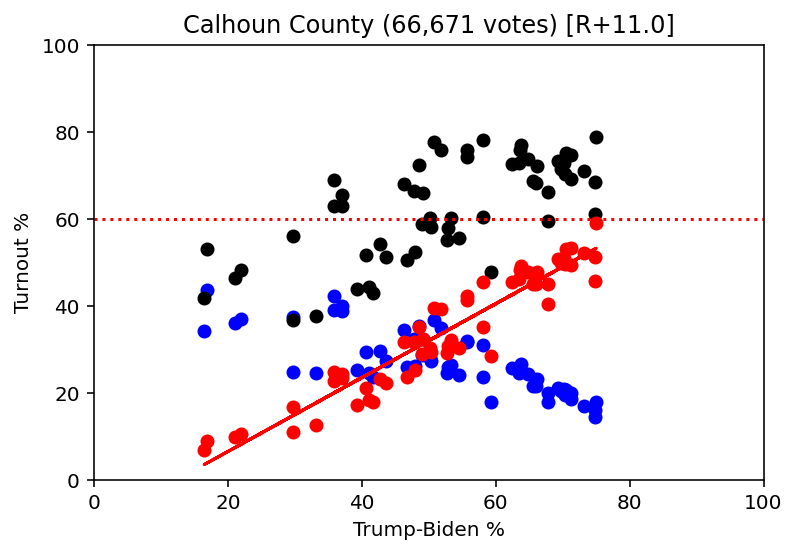

In [6]:
def addSlopeLine(xset, yset, color, cutoff,op):
    slope_points_x = []
    slope_points_y = []

    for index, value in enumerate(xset):
        if op(value,cutoff):
            slope_points_x.append(value)
            slope_points_y.append(yset[index])  

    m, b = np.polyfit(slope_points_x, slope_points_y, 1)
    x = np.array(slope_points_x)
    plt.plot(x, m*x + b, color=color, label=f'slope: {round(m, 3)}')

plt.scatter(
    trump_percent,
    biden_turnout_percent,
    color='blue'
)
plt.scatter(
    trump_percent,
    turnout_percent,
    color='black'
)
plt.xlabel('Trump-Biden %')
plt.ylabel('Turnout %')
#plt.axvline(x=0.2, color='red', linestyle='dotted')

#addSlopeLine(trump_percent, biden_turnout_percent, 'blue', cutoff, operator.ge)
#addSlopeLine(trump_percent, biden_delta_percent, 'blue', cutoff, operator.le)
#addSlopeLine(trump_percent, biden_delta_percent, 'black', 0.0, operator.ge)

#plt.legend(loc=0)

total_votes = president['votes_cast'].sum()
trump_overall = president['trump'].sum() / total_votes
biden_overall = president['biden'].sum() / total_votes


if trump_overall > biden_overall:
    margin = 'R+' + "{:.1f}".format((trump_overall - biden_overall)*100)
else:
    margin = 'D+' + "{:.1f}".format((biden_overall - trump_overall)*100)

plt.title('{0} ({1} votes) [{2}]'.format(county_name, "{:,}".format(total_votes), margin))
#plt.show()

#Trump chart
plt.scatter(
    trump_percent,
    trump_turnout_percent,
    color='red'
)
plt.xlim([0,100])
plt.ylim([0,100])
plt.xlabel('Trump-Biden %')
plt.ylabel('Turnout %')
plt.axhline(y=60, color='red', linestyle='dotted')

addSlopeLine(trump_percent, trump_turnout_percent, 'red', cutoff,operator.ge)
#addSlopeLine(trump_percent, trump_delta_percent, 'red', cutoff,operator.le)


#plt.legend(loc=0)
plt.show()